<h2>Cleared Building Permits Visualization</h2>

This dataset provides information on Building Permits completed/closed.

A building permit is a municipally issued permit, required by the Building Code Act and enforced by the City of Toronto, associated with the construction/demolition of a physical structure

Data is collected from permit applications and updates made by City Staff when reviewing the application and Inspecting the work on the issued permit.

Dataset Link: https://open.toronto.ca/dataset/building-permits-cleared-permits/

<h2>Objectives:</h2>

1. To show long-term trends in Toronto's construction activity.

2. To understand which types of construction dominate.


In [35]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [36]:
with zipfile.ZipFile("Cleared Permits 2000 to 2016.zip", 'r') as zip_ref:
    zip_ref.extract("Cleared Permits 2000 to 2016.csv", ".")
with zipfile.ZipFile("Cleared Building Permits since 2017.zip", 'r') as zip_ref:
    zip_ref.extract("Cleared Building Permits since 2017.csv", ".")    
# Load the CSVs
df_2000_2016 = pd.read_csv("Cleared Permits 2000 to 2016.csv")
df_2017_onward = pd.read_csv("Cleared Building Permits since 2017.csv")

C:\Users\vrush\AppData\Local\Temp\ipykernel_14228\4042235959.py:6: DtypeWarning: Columns (1,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000_2016 = pd.read_csv("Cleared Permits 2000 to 2016.csv")
C:\Users\vrush\AppData\Local\Temp\ipykernel_14228\4042235959.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017_onward = pd.read_csv("Cleared Building Permits since 2017.csv")


In [37]:
# Combine and Clean
df = pd.concat([df_2000_2016, df_2017_onward], ignore_index=True)

# Ensure date column is in datetime format
df['COMPLETED_DATE'] = pd.to_datetime(df['COMPLETED_DATE'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['COMPLETED_DATE'])

# Extract year
df['Year'] = df['COMPLETED_DATE'].dt.year


In [38]:
df.head()

,PERMIT_NUM,REVISION_NUM,PERMIT_TYPE,STRUCTURE_TYPE,WORK,STREET_NUM,STREET_NAME,STREET_TYPE,STREET_DIRECTION,POSTAL,...,INSTITUTIONAL,RESIDENTIAL,BUSINESS_AND_PERSONAL_SERVICES,MERCANTILE,INDUSTRIAL,INTERIOR_ALTERATIONS,DEMOLITION,_id,BUILDER_NAME,Year
0,00 034659 HVA,0,Mechanical(MS),Restaurant Greater Than 30 Seats,Building Permit Related(MS),3477,KENNEDY,RD,,M1V,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2005
1,00 034659 PLB,0,Plumbing(PS),Restaurant Greater Than 30 Seats,Building Permit Related(PS),3477,KENNEDY,RD,,M1V,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2005
2,00 106940 CMB,1,Residential Building Permit,SFD - Detached,Alteration to Existing Building,28,WIMPOLE,DR,,M2L,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2009
3,00 114462 HVA,1,Residential Building Permit,SFD - Detached,Install/Alter HVAC - only,7,OAKLEY,PL,,M2P,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2001
4,00 118593 HVA,0,Non-Residential Building Permit,Office,Install/Alter HVAC - only,15,COLDWATER,RD,,M3B,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2001


C:\Users\vrush\AppData\Local\Temp\ipykernel_14228\3298521067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_counts, x='Year', y='Permit Count', palette='tab10')


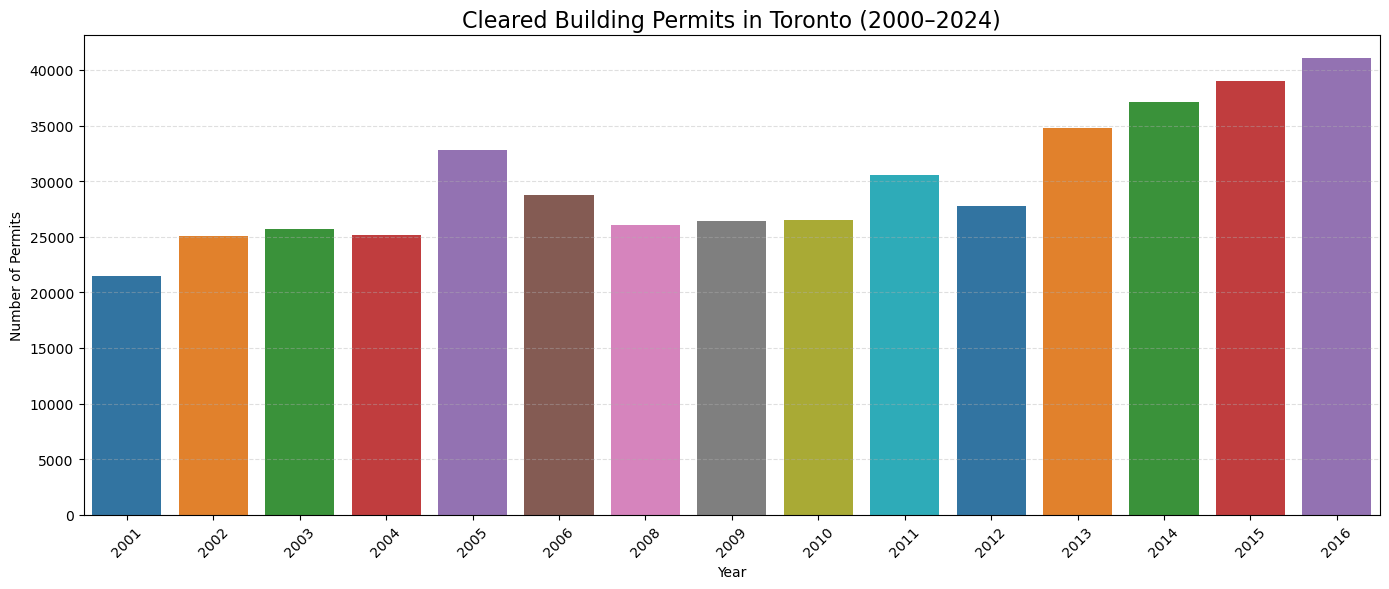

In [39]:
# Aggregate by Year
yearly_counts = df.groupby('Year').size().reset_index(name='Permit Count')

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(data=yearly_counts, x='Year', y='Permit Count', palette='tab10')

plt.title('Cleared Building Permits in Toronto (2000–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

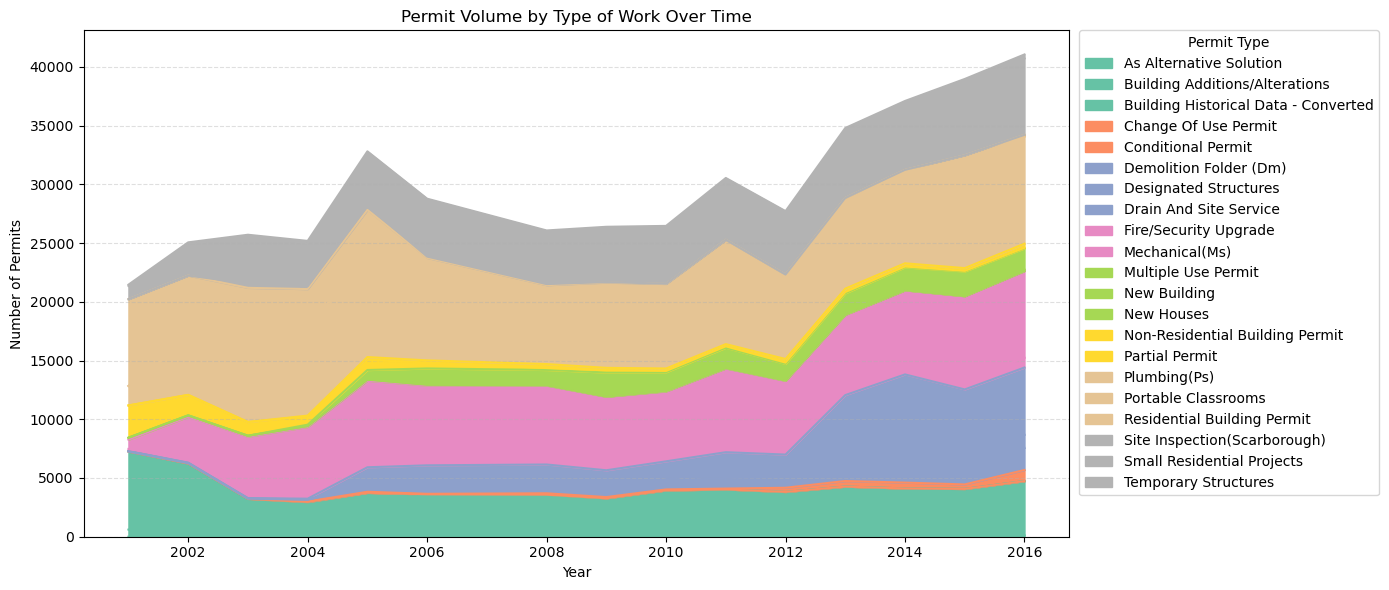

In [40]:
#Visualization: Permit Volume by Type of Work Over Time

df['Permit_Type'] = df['PERMIT_TYPE'].str.title()  # Clean up formatting
work_trend = df.groupby(['Year', 'Permit_Type']).size().unstack(fill_value=0)

work_trend.plot(kind='area', stacked=True, figsize=(14, 6), colormap='Set2')
plt.title('Permit Volume by Type of Work Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
#plt.legend(title='Work Type', loc='upper right')
plt.legend(
    title='Permit Type',
    loc='upper left',
    bbox_to_anchor=(1.01, 1),  # Shift outside right edge
    borderaxespad=0
)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
